# Kernal Support Vector Machine

## Mapping to a higher dimension

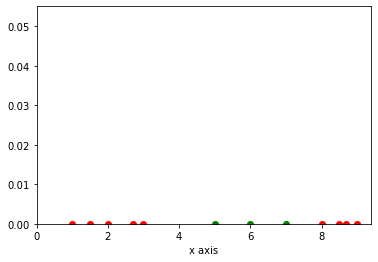

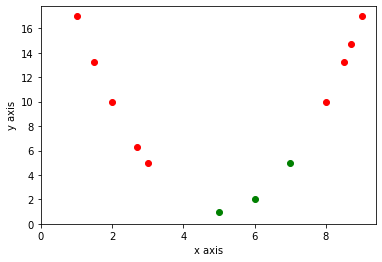

In [1]:
import matplotlib.pyplot as plt
x = [1, 1.5, 2, 2.7, 3, 5, 6, 7, 8, 8.5, 8.7, 9]
result = [False, False, False, False, False,
          True, True, True, False, False, False, False]
for i in range(len(x)):
    plt.scatter(x=x[i], y=0, color=('red', 'green')[result[i]],)
plt.xlim(0)
plt.ylim(0)
plt.xlabel('x axis')
plt.show()


def mappingFunc(X):
    '''
    y = (x-4)^2
    '''
    y = []
    for x in X:
        y.append(1 + (x-5)**2)
    return y


y = mappingFunc(x)
for i in range(len(x)):
    plt.scatter(x=x[i], y=y[i], color=('red', 'green')[result[i]],)
plt.xlim(0)
plt.ylim(0)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()


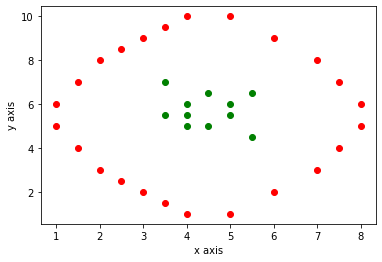

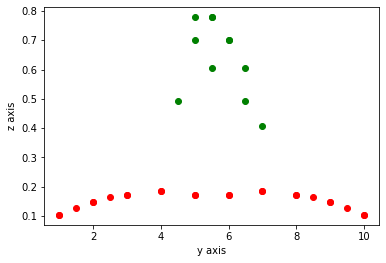

Text(0.5, 0, 'z axis')

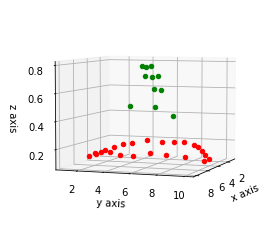

In [2]:
from math import sqrt, exp
import matplotlib.pyplot as plt
x = [1, 1, 1.5, 1.5, 2, 2, 2.5, 2.5, 3, 3, 3.5, 3.5, 4, 4, 5,
     5, 6, 6, 7, 7, 7.5, 7.5, 8, 8, 3.5, 3.5, 4, 4, 4, 4.5, 4.5, 5, 5, 5.5, 5.5]
y = [5, 6, 4, 7, 3, 8, 2.5, 8.5, 2, 9, 1.5, 9.5, 1, 10, 1, 10,
     2, 9, 3, 8, 4, 7, 5, 6, 5.5, 7, 5, 5.5, 6, 6.5, 5, 5.5, 6, 6.5, 4.5, 6]
result = [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True]
z = []
for i in range(len(x)):
    plt.scatter(
        x=x[i], y=y[i],
        color=('red', 'green')[result[i]],
    )
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()


def mappingFunc(X, Y):
    '''
    z = e ^ -1 * ((distance between point [x, y] and center landmark) / 2 * sigma^2)
    Given formula is Gaussian (RBF) Radial Basis Function
    '''
    landmark = [4.5, 5.5]
    sigma = 1
    z = []
    for x, y in zip(X, Y):
        distance = sqrt(((x-landmark[0])**2)+((y-landmark[1])**2))
        z.append(exp(-1 * (distance/2*sigma**2)))
    return z


z = mappingFunc(x, y)

for i in range(len(x)):
    plt.scatter(
        x=y[i], y=z[i],
        color=('red', 'green')[result[i]],
    )
plt.xlabel('y axis')
plt.ylabel('z axis')
plt.show()

threeD = plt.axes(projection='3d')
threeD.view_init(5, 20)
for i in range(len(x)):
    threeD.scatter3D(x[i], y[i], z[i], cmap='viridis',
                     color=('red', 'green')[result[i]])
threeD.set_xlabel('x axis')
threeD.set_ylabel('y axis')
threeD.set_zlabel('z axis')


## Data preprocessing

✔️ Import the necessary libraries.

✔️ Load dataset (Social_Network_Ads.csv).

❌ Our dataset doesn't have any missing data.

❌ Our dataset doesn't have any string data.

✔️ We have 400 data. So, we can split and have 75% for the training set and 25% for the testing set.

✔️ Applying feature scaling for the dataset will improve the performance of the model.

In [3]:
# Import libraries....
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# setting two digits after decimal point...
np.set_printoptions(precision=2)

In [4]:
# Load dataset...
dataset = pd.read_csv(r"../dataset/Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values # [row, column]
y = dataset.iloc[:, -1].values

In [5]:
# Split testing and training dataset...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
# Performing feature scaling for the independent variable...
# Dependent variable y is already having 0's & 1's...
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

## Train Kernal SVC Model
- We are using scikit-learn's [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?#sklearn-svm-svc) module.


In [7]:
from sklearn.svm import SVC
# please try with follow kernal functions {'poly', 'rbf', 'sigmoid'}
svc_calssifier = SVC(kernel="rbf", random_state=0)
svc_calssifier.fit(X_train, y_train)


SVC(random_state=0)

## Predict New Value

In [8]:
print("Y Prediction : ", svc_calssifier.predict(x_sc.transform([[35,20000]])))

Y Prediction :  [0]


## Test Kernal SVC Model

In [9]:
y_pred = svc_calssifier.predict(X_test)
print("Comparison of y_pred & y_test", np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1), sep='\n')

Comparison of y_pred & y_test
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Create Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Confusion Matrix : ")
print(matrix)

# Detail view of matrix
print("Detail view of matrix : ")
NO_OF_CATEGORY = len(set(y_test))
for i in range(NO_OF_CATEGORY):
    for j in range(NO_OF_CATEGORY):
        print(f"Expect {j}", f"Predict {i}", ":", matrix[i][j])

Confusion Matrix : 
[[64  4]
 [ 3 29]]
Detail view of matrix : 
Expect 0 Predict 0 : 64
Expect 1 Predict 0 : 4
Expect 0 Predict 1 : 3
Expect 1 Predict 1 : 29


## Classification Accuracy Score

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=y_test, y_pred=y_pred))

0.93


## Classification Report

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['Age', 'Estimated Salary']))

                  precision    recall  f1-score   support

             Age       0.96      0.94      0.95        68
Estimated Salary       0.88      0.91      0.89        32

        accuracy                           0.93       100
       macro avg       0.92      0.92      0.92       100
    weighted avg       0.93      0.93      0.93       100



## Visualising Train Set Result

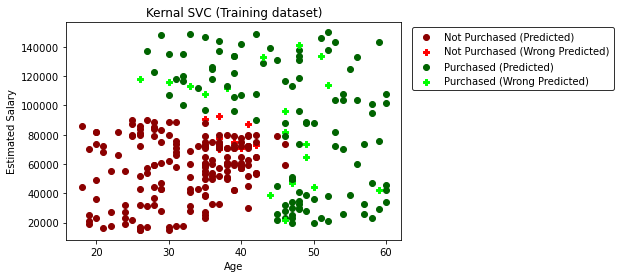

In [13]:
for i in zip(x_sc.inverse_transform(X_train), y_train):
    X = i[0]
    y = i[1]
    y_pred = svc_calssifier.predict(x_sc.transform([X]))
    if y == y_pred[0]:
        plt.scatter(
            x=X[0], y=X[1], marker='o',
            color=('#8B0000', '#006400')[y_pred[0]], 
            label=('Not Purchased (Predicted)', 'Purchased (Predicted)')[y_pred[0]]
        )
    else:
        plt.scatter(
            x=X[0], y=X[1], marker='P',
            color=('#FF0000', '#00FF00')[y_pred[0]], 
            label=('Not Purchased (Wrong Predicted)', 'Purchased (Wrong Predicted)')[y_pred[0]]
        )
plt.title("Kernal SVC (Training dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

handles, labels = plt.gca().get_legend_handles_labels()
label_dict = dict(zip(labels, handles))
by_label = {key:label_dict[key] for key in sorted(label_dict)}
plt.legend(by_label.values(), by_label.keys(), loc='upper right', edgecolor="black", bbox_to_anchor=(1.65, 1))
plt.show()

## Visualising Test Set Result

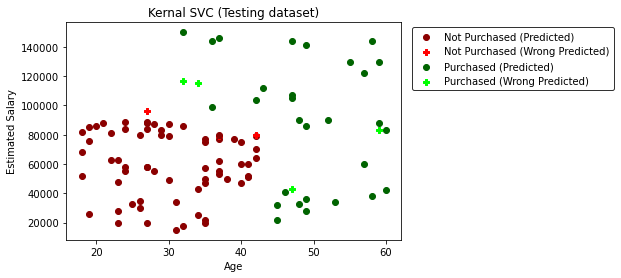

In [14]:
for i in zip(x_sc.inverse_transform(X_test), y_test):
    X = i[0]
    y = i[1]
    y_pred = svc_calssifier.predict(x_sc.transform([X]))
    if y == y_pred[0]:
        plt.scatter(
            x=X[0], y=X[1], marker='o',
            color=('#8B0000', '#006400')[y_pred[0]], 
            label=('Not Purchased (Predicted)', 'Purchased (Predicted)')[y_pred[0]]
        )
    else:
        plt.scatter(
            x=X[0], y=X[1], marker='P',
            color=('#FF0000', '#00FF00')[y_pred[0]], 
            label=('Not Purchased (Wrong Predicted)', 'Purchased (Wrong Predicted)')[y_pred[0]]
        )
plt.title("Kernal SVC (Testing dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

handles, labels = plt.gca().get_legend_handles_labels()
label_dict = dict(zip(labels, handles))
by_label = {key:label_dict[key] for key in sorted(label_dict)}
plt.legend(by_label.values(), by_label.keys(), loc='upper right', edgecolor="black", bbox_to_anchor=(1.65, 1))
plt.show()